<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Natural Language Processing
 
_Authors: Kiefer Katovich (San Francisco), Joseph Nelson (Washington, D.C.)_
 
---

### Learning Objectives
- Discuss the major tasks involved with natural language processing.
- Discuss, on a low level, the components of natural language processing.
- Identify why natural language processing is difficult.
- Demonstrate text classification.
- Demonstrate common text preprocessing techniques.

## How Do We Use NLP in Data Science?

In data science, we are often asked to analyze unstructured text or make a predictive model using it. Unfortunately, most data science techniques require numeric data. NLP libraries provide a tool set of methods to convert unstructured text into meaningful numeric data.

- **Analysis:** NLP techniques provide tools to allow us to understand and analyze large amounts of text. For example:

    - Analyze the positivity/negativity of comments on different websites. 
    - Extract key words from meeting notes and visualize how meeting topics change over time.



- **Vectorizing for machine learning:** When building a machine learning model, we typically must transform our data into numeric features. This process of transforming non-numeric data such as natural language into numeric features is called vectorization. For example:

    - Understanding related words. Using stemming, NLP lets us know that "swim", "swims", and "swimming" all refer to the same base word. This allows us to reduce the number of features used in our model.
    - Identifying important and unique words. Using TF-IDF (term frequency-inverse document frequency), we can identify which words are most likely to be meaningful in a document.

<a id='textblob_install'></a>

### Install TextBlob

The TextBlob Python library provides a simplified interface for exploring common NLP tasks including part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

To proceed with the lesson, first install TextBlob, as explained below. We tend to prefer Anaconda-based installations, since they tend to be tested with our other Anaconda packages.

**To install textblob run:**

> `conda install -c conda-forge textblob`

**Or:**

> `pip install textblob`

> `python -m textblob.download_corpora lite`

In [ ]:
pip install textblob

## Lesson Guide

- [Introduction to Natural Language Processing](#intro)
- [Reading Yelp reviews With NLP](#yelp_rev)
- [Text Classification](#text_class)
- [Count Vectorization](#count_vec)
    - [Using CountVectorizer in a Model](#countvectorizer-model)
    - [N-Grams](#ngrams)
    - [Stop-Word Removal](#stopwords)
	- [Count Vector Options](#cvec_opt)
- [Intro to TextBlob](#textblob)
	- [Stemming and Lemmatization](#stem)
- [Term Frequency–Inverse Document Frequency Vectorization](#tfidf)
	- [Yelp Summary Using TF–IDF](#yelp_tfidf)
- [Sentiment Analysis](#sentiment)
- [BONUS: Adding Features to a Document-Term Matrix](#add_feat)
- [BONUS: More TextBlob Features](#more_textblob)
- [APPENDIX: Intro to Naive Bayes and Text Classification](#bayes)
- [Conclusion](#conclusion)

<a id='intro'></a>

## Introduction

*Adapted from [NLP Crash Course](http://files.meetup.com/7616132/DC-NLP-2013-09%20Charlie%20Greenbacker.pdf) by Charlie Greenbacker and [Introduction to NLP](http://spark-public.s3.amazonaws.com/nlp/slides/intro.pdf) by Dan Jurafsky*

### What Is Natural Language Processing (NLP)?

- Using computers to process (analyze, understand, generate) natural human languages.
- Making sense of human knowledge stored as unstructured text.
- Building probabilistic models using data about a language.

### What Are Some of the Higher-Level Task Areas?

- **Objective:** Discuss the major tasks involved with natural language processing.

We often hope that computers can solve many high-level problems involving natural language. Unfortunately, due to the difficulty of understanding human language, many of these problems are still not well solved. That said, existing solutions to these problems all involve utilizing the lower-level components of NLP discussed in the next section. Some higher-level tasks include:

- **Chatbots:** Understand natural language from the user and return intelligent responses.
    - [Api.ai](https://api.ai/)
- **Information retrieval:** Find relevant results and similar results.
    - [Google](https://www.google.com/)    
- **Information extraction:** Structured information from unstructured documents.
    - [Events from Gmail](https://support.google.com/calendar/answer/6084018?hl=en)
- **Machine translation:** One language to another.
    - [Google Translate](https://translate.google.com/)
- **Text simplification:** Preserve the meaning of text, but simplify the grammar and vocabulary.
    - [Rewordify](https://rewordify.com/)
    - [Simple English Wikipedia](https://simple.wikipedia.org/wiki/Main_Page)
- **Predictive text input:** Faster or easier typing.
    - [Phrase completion application](https://justmarkham.shinyapps.io/textprediction/)
    - [A much better application](https://farsite.shinyapps.io/swiftkey-cap/)
- **Sentiment analysis:** Attitude of speaker.
    - [Hater News](https://medium.com/@KevinMcAlear/building-hater-news-62062c58325c)
- **Automatic summarization:** Extractive or abstractive summarization.
    - [autotldr](https://www.reddit.com/r/technology/comments/35brc8/21_million_people_still_use_aol_dialup/cr2zzj0)
- **Natural language generation:** Generate text from data.
    - [How a computer describes a sports match](http://www.bbc.com/news/technology-34204052)
    - [Publishers withdraw more than 120 gibberish papers](http://www.nature.com/news/publishers-withdraw-more-than-120-gibberish-papers-1.14763)
- **Speech recognition and generation:** Speech-to-text, text-to-speech.
    - [Google's Web Speech API demo](https://www.google.com/intl/en/chrome/demos/speech.html)
    - [Vocalware Text-to-Speech demo](https://www.vocalware.com/index/demo)
- **Question answering:** Determine the intent of the question, match query with knowledge base, evaluate hypotheses.
    - [How did supercomputer Watson beat Jeopardy champion Ken Jennings?](http://blog.ted.com/how-did-supercomputer-watson-beat-jeopardy-champion-ken-jennings-experts-discuss/)
    - [IBM's Watson Trivia Challenge](http://www.nytimes.com/interactive/2010/06/16/magazine/watson-trivia-game.html)
    - [The AI Behind Watson](http://www.aaai.org/Magazine/Watson/watson.php)

### What Are Some of the Lower-Level Components?

- **Objective:** Discuss, on a low level, the components of natural language processing.

Unfortunately, the NLP programming libraries typically do not provide direct solutions for the high-level tasks above. Instead, they provide low-level building blocks that enable us to craft our own solutions. These include:

- **Tokenization:** Breaking text into tokens (words, sentences, n-grams)
- **Stop-word removal:** a/an/the
- **Stemming and lemmatization:** root word
- **TF-IDF:** word importance
- **Part-of-speech tagging:** noun/verb/adjective
- **Named entity recognition:** person/organization/location
- **Spelling correction:** "New Yrok City"
- **Word sense disambiguation:** "buy a mouse"
- **Segmentation:** "New York City subway"
- **Language detection:** "translate this page"
- **Machine learning:** specialized models that work well with text

### Why is NLP hard?

- **Objective:** Identify why natural language processing is difficult.

Natural language processing requires an understanding of the language and the world. As it is considered unstructured data, we must provide structure, which has its challenges and subjectivity. Several limitations of NLP are:

- **Ambiguity**:
    - Hospitals Are Sued by 7 Foot Doctors
    - Juvenile Court to Try Shooting Defendant
    - Local High School Dropouts Cut in Half
- **Sarcasm**: "I love those mustard stains on your oversized hoodie. They really bring out the color in your eyes."
- **Non-standard English:** text messages
- **Idioms:** "throw in the towel"
- **Newly coined words:** "retweet"
- **Tricky entity names:** "Where is A Bug's Life playing?"
- **World knowledge:** "Mary and Sue are sisters", "Mary and Sue are mothers"

<a id='text_class'></a>


# Introduction: Text Classification

As you proceed through this section, note that text classification is done in the same way as all other classification models. First, the text is vectorized into a set of numeric features. Then, a standard machine learning classifier is applied. NLP libraries often include vectorizers and ML models that work particularly well with text.

> We will refer to each piece of text we are trying to classify as a document.
> - For example, a document could refer to an email, book chapter, tweet, article, or text message.

<br>
<br>

**Text classification is the task of predicting which category or topic a text sample is from.**

We may want to identify:
- Is an article a sports or business story?
- Does an email have positive or negative sentiment?
- Is the rating of a recipe 1, 2, 3, 4, or 5 stars?

**Predictions are often made by using the words as features and the label as the target output.**

Starting out, we will make each unique word (across all documents) a single feature. In any given corpora, we may have hundreds of thousands of unique words, so we may have hundreds of thousands of features!

- For a given document, the numeric value of each feature could be:

    - **number of times the word appears in the document**. Most features will have a value of zero, resulting in a sparse matrix of features.

    - **indicator column, which is 1 if the word is present in the document (no matter how many times) and 0 if not.**  This vectorization could be used to reduce the importance of repeated words
    
    - For example, a website search engine would be susceptible to spammers who load websites with repeated words. 


- This technique for vectorizing text is referred to as a **bag-of-words** model. 
    - It is called **bag of words** because the document's structure is lost — as if the words are all jumbled up in a bag.
    - The first step to creating a bag-of-words model is to create a vocabulary of all possible words in the corpora.


**We need to consider several things to decide if bag-of-words is appropriate.**

- Does order of words matter?
- Does punctuation matter?
- Does upper or lower case matter?

This table illustrates features created from the following passage.

“It’s a great advantage not to drink among hard drinking people.”

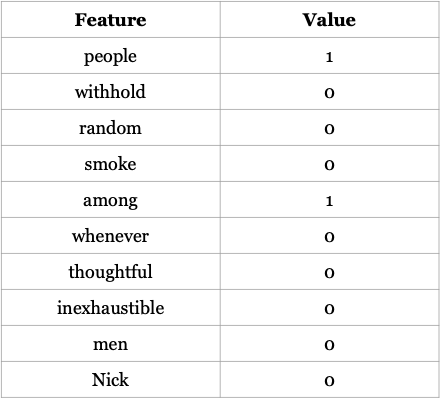 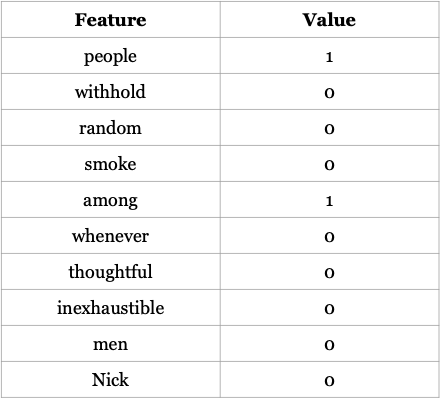

## Demo: Text Processing in scikit-learn

- **Objective:** Demonstrate text classification.

<a id='yelp_rev'></a>

### Reading in the Yelp Reviews

Throughout this lesson, we will use Yelp reviews to practice and discover common low-level NLP techniques.

Additionally, we will use a model very popular for text classification called Naive Bayes (the "NB" in `BinonmialNB` and `MultinomialNB` below).

**Load Libraries**

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

%matplotlib inline

**Read in Data and define X and y**

In [ ]:
# Read yelp.csv into a DataFrame.
path = './data/yelp.csv'
yelp = pd.read_csv(path)

# Create a new DataFrame that only contains the 5-star and 1-star reviews.
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# Define X and y.
X = yelp_best_worst.text
y = yelp_best_worst.stars

In [ ]:
yelp.head()

**Split data into train/test**

In [ ]:
# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Tokenization

- Tokenization is the task of separating a sentence into its constituent parts, or tokens.

- Determining the “words” of a sentence seems easy but can quickly become complicated with unusual punctuation (common in social media) or different language conventions.

**What sort of difficulties can you find in tokenizing the following sentence?**

> The San Antonio Spurs won the NBA championship in 2014, defeating the Miami Heat.*

#### Tokenization Examples
My house is located in Uptown. → [My, house, is, located, in, Uptown]

The Lakers are my favorite team. → [The, Lakers, are, my, favorite, team]

Data Science is the future! → [Data, Science, is, the, future]

GA has many locations. → [GA, has, many, locations]

<a id='count_vec'></a>


### Creating Features Using CountVectorizer

- **What:** Converts each document into a set of words and their counts.
- **Why:** To use a machine learning model, we must convert unstructured text into numeric features.
- **Notes:** Relatively easy with English language text, not as easy with some languages.

In [ ]:
# Use CountVectorizer to create document-term matrices from X_train and X_test.
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [ ]:
# Rows are documents, columns are terms (aka "tokens" or "features", individual words in this situation).
X_train_dtm.shape

In [ ]:
# View features
print((vect.get_feature_names()[500::]))

[CountVectorizer documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

One common method of reducing the number of features is converting all text to lowercase before generating features! Note that to a computer, `aPPle` is a different token/"word" than `apple`. So, by converting both to lowercase letters, it ensures fewer features will be generated. It might be useful not to convert them to lowercase if capitalization matters.

In [ ]:
# Don't convert to lowercase.
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape
vect.get_feature_names()[500::]

<a id='countvectorizer-model'></a>


### Using CountVectorizer in a Model
![DTM](images/DTM.png)

In [ ]:
# Use default options for CountVectorizer.
vect = CountVectorizer()

# Create document-term matrices.
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Use Naive Bayes to predict the star rating.
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class)))

In [ ]:
y_test.value_counts()

In [ ]:
# Calculate null accuracy.
y_test_binary = np.where(y_test==5, 1, 0) # five stars become 1, one stars become 0
print('Percent 5 Stars:', y_test_binary.mean())
print('Percent 1 Stars:', 1 - y_test_binary.mean())

Our model predicted ~92% accuracy, which is an improvement over this baseline 82% accuracy (assuming our model always predicts 5 stars).

Let's look more into how the vectorizer works.

----------------------------------------------------

Notice how the data was transformed into this sparse matrix with 1,022 datapoints and 16,825 features!
   - Recall that vectorizations of text will be mostly zeros, since only a few unique words are in each document.
   - For that reason, instead of storing all the zeros we only store non-zero values (inside the 'sparse matrix' data structure!).
   - We have 3064 Yelp reviews in our training set.
   - 16,825 unique words were found across all documents.

In [ ]:
X_train_dtm

 Let's take a look at the vocabulary that was generated, containing 16,825 unique words.
   - 'vocabulary_' is a dictionary that converts each word to its index in the sparse matrix.
   - For example, the word "four" is index #3230 in the sparse matrix.

In [ ]:
# Let's take a look at the vocabulary that was generated, containing 16,825 unique words.
#   'vocabulary_' is a dictionary that converts each word to its index in the sparse matrix.
#   - For example, the word "four" is index #3230 in the sparse matrix.

vect.vocabulary_

In [ ]:
# We will use this function below for simplicity.

# Define a function that accepts a vectorizer and calculates the accuracy.
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print(('Features: ', X_train_dtm.shape[1]))
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print(('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)))

In [ ]:
# min_df ignores words that occur less than twice ('df' means "document frequency").
vect = CountVectorizer(min_df=2, max_features=10000)
tokenize_test(vect)

### Exercises
#### 1. Drug Reviews- Default Count Vectorizer

In [ ]:
drug_reviews=pd.read_table('./data/drugsComTrain_raw.tsv', sep='\t')

In [ ]:
drug_reviews.rename(columns={"Unnamed: 0": "User_ID"}, inplace=True)

In [ ]:
drug_reviews.set_index('User_ID', inplace=True)

In [ ]:
drug_reviews_weightloss = drug_reviews[drug_reviews['condition']=='Weight Loss']

In [ ]:
def transform_ratings_simplified(rating):
    if rating <= 3:
        return 1
    elif rating > 3 and rating <= 6:
        return 2 
    elif rating >= 7 and rating<9:
        return 3 
    elif rating >=9:
        return 4 

#Applying transform method and assigning result to new column "points_simplified"
drug_reviews_weightloss = drug_reviews_weightloss.assign(ratings_simplified = drug_reviews_weightloss['rating'].apply(transform_ratings_simplified))
drug_reviews_weightloss.head()

**Define X and Y, split into train/test (use `random_state`=1) and then convert them to DTMs.  Build a Naive Bayes model and calculate accuracy on the test set.**

**Compare to Baseline Accuracy**

**Add a prediction column to the original drug_reviews_weightloss dataset.  Using groupby, compare the average predictions vs. the actual ratings by drug name.**

**Predict the following with your model.**

In [ ]:
test= ['This drug sucks!','This drug did not work.', 'This drug worked for me','This drug is great!']

In [ ]:
test_dtm=vect.transform(test)

In [ ]:
nb.predict(test_dtm)



<a id='ngrams'></a>
### N-Grams

N-grams are features which consist of N consecutive words. This is useful because using the bag-of-words model, treating `data scientist` as a single feature has more meaning than having two independent features `data` and `scientist`!

Example:
```
my cat is awesome
Unigrams (1-grams): 'my', 'cat', 'is', 'awesome'
Bigrams (2-grams): 'my cat', 'cat is', 'is awesome'
Trigrams (3-grams): 'my cat is', 'cat is awesome'
4-grams: 'my cat is awesome'
```

- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [ ]:
# Read yelp.csv into a DataFrame.
path = './data/yelp.csv'
yelp = pd.read_csv(path)

# Create a new DataFrame that only contains the 5-star and 1-star reviews.
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# Define X and y.
X = yelp_best_worst.text
y = yelp_best_worst.stars

**Split data into train/test**

In [ ]:
# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Include 1-grams and 2-grams.
vect = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

We can start to see how supplementing our features with n-grams can lead to more feature columns. When we produce n-grams from a document with $W$ words, we add an additional $(n-W+1)$ features (at most). That said, be careful — when we compute n-grams from an entire corpus, the number of _unique_ n-grams could be vastly higher than the number of _unique_ unigrams! This could cause an undesired feature explosion.

Although we sometimes add important new features that have meaning such as `data scientist`, many of the new features will just be noise. So, particularly if we do not have much data, adding n-grams can actually decrease model performance. This is because if each n-gram is only present once or twice in the training set, we are effectively adding mostly noisy features to the mix.

In [ ]:
# Last 50 features
print((vect.get_feature_names()[-50:]))

<a id='stopwords'></a>

### Stop-Word Removal

- **What:** This process is used to remove common words that will likely appear in any text.
- **Why:** Because common words exist in most documents, they likely only add noise to your model and should be removed.

**What are stop words?**
Stop words are some of the most common words in a language. They are used so that a sentence makes sense grammatically, such as prepositions and determiners, e.g., "to," "the," "and." However, they are so commonly used that they are generally worthless for predicting the class of a document. Since "a" appears in spam and non-spam emails, for example, it would only contribute noise to our model.

Example: 

> 1. Original sentence: "The dog jumped over the fence"  
> 2. After stop-word removal: "dog jumped over fence"

The fact that there is a fence and a dog jumped over it can be derived with or without stop words.

- **stop_words:** string {`english`}, list, or None (default)
- If `english`, a built-in stop word list for English is used.
- If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
- If None, no stop words will be used. `max_df` can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency of terms. (If `max_df` = 0.7, then if > 70% of documents contain a word it will not be included in the feature set!)

In [ ]:
# Remove English stop words.
vect = CountVectorizer(stop_words='english')
tokenize_test(vect)
vect.get_params()

In [ ]:
# Set of stop words
print((vect.get_stop_words()))

<a id='cvec_opt'></a>
### Other CountVectorizer Options

- `max_features`: int or None, default=None
- If not None, build a vocabulary that only consider the top `max_features` ordered by term frequency across the corpus. This allows us to keep more common n-grams and remove ones that may appear once. If we include words that only occur once, this can lead to said features being highly associated with a class and cause overfitting.

In [ ]:
# Remove English stop words and only keep 100 features.
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect)

In [ ]:
# All 100 features
print((vect.get_feature_names()))

Just like with all other models, more features does not mean a better model. So, we must tune our feature generator to remove features whose predictive capability is none or very low.

In this case, there is roughly a 1.6% increase in accuracy when we double the n-gram size and increase our max features by 1,000-fold. Note that if we restrict it to only unigrams, then the accuracy increases even more! So, bigrams were very likely adding more noise than signal. 

In the end, by only using 16,000 unigram features we came away with a much smaller, simpler, and easier-to-think-about model which also resulted in higher accuracy.

In [ ]:
# Include 1-grams and 2-grams, and limit the number of features.

print('1-grams and 2-grams, up to 100K features:')
vect = CountVectorizer(ngram_range=(1, 2), max_features=100000)
tokenize_test(vect)

print()
print('1-grams only, up to 100K features:')
vect = CountVectorizer(ngram_range=(1, 1), max_features=100000)
tokenize_test(vect)

- `min_df`: Float in range [0.0, 1.0] or int, default=1
- When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts.

In [ ]:
# Include 1-grams and 2-grams, and only include terms that appear at least two times.
vect = CountVectorizer(ngram_range=(1, 2), min_df=3)
tokenize_test(vect)

### Exercises
#### 2. Drug Reviews- Stop Words and N-Grams

In [ ]:
# Define X and y.
X = drug_reviews_weightloss.review
y = drug_reviews_weightloss.ratings_simplified

In [ ]:
# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

**Build a Count Vectorizer removing stop words, use 1-2 ngrams, and min_df=3. Build a model and calculate the accuracy on your test set.**

**Add a new prediction column to the original weightloss dataset.  Compare the count of each drug in the dataset vs. the average predictions.  Do you notice anything?**

In [ ]:
drug_reviews_weightloss.drugName.value_counts()

In [ ]:
drug_reviews_weightloss.groupby('drugName').mean().sort_values('pred2', ascending=False)

**Score the following phrases for fun.**

In [ ]:
test= ['This drug sucks!','This drug did not work.', 'This drug worked for me','This drug is great!',
      'Bupropion is awful']

In [ ]:
test_dtm=vect.transform(test)

In [ ]:
nb.predict(test_dtm)

**View the observation from user_id 39159.  View the text and see why it is a 2 rating, compare it to your prediction.**

<a id='textblob'></a>
## Introduction to TextBlob

You should already have downloaded TextBlob, a Python library used to explore common NLP tasks. If you haven’t, please return to [this step](#textblob_install) for instructions on how to do so. We’ll be using this to organize our corpora for analysis.

As mentioned earlier, you can read more on the [TextBlob website](https://textblob.readthedocs.io/en/dev/).

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

In [ ]:
# Print the first review.
print((yelp_best_worst.text[0]))

In [ ]:
# Save it as a TextBlob object.
review = TextBlob(yelp_best_worst.text[0])

In [ ]:
# List the words.
review.words

In [ ]:
# List the sentences.
review.sentences

In [ ]:
# Some string methods are available.
review.lower()

<a id='stem'></a>
## Stemming and Lemmatization

Stemming is a crude process of removing common endings from sentences, such as "s", "es", "ly", "ing", and "ed".

- **What:** Reduce a word to its base/stem/root form.
- **Why:** This intelligently reduces the number of features by grouping together (hopefully) related words.
- **Notes:**
    - Stemming uses a simple and fast rule-based approach.
    - Stemmed words are usually not shown to users (used for analysis/indexing).
    - Some search engines treat words with the same stem as synonyms.

In [ ]:
# Initialize stemmer.
stemmer = SnowballStemmer('english')

# Stem each word.
print([stemmer.stem(word) for word in review.words])

Some examples you can see are "excellent" stemmed to "excel" and "amazing" stemmed to "amaz".

Lemmatization is a more refined process that uses specific language and grammar rules to derive the root of a word.  

This is useful for words that do not share an obvious root such as "better" and "best".

- **What:** Lemmatization derives the canonical form ("lemma") of a word.
- **Why:** It can be better than stemming.
- **Notes:** Uses a dictionary-based approach (slower than stemming).

In [ ]:
# Assume every word is a noun.
print([word.lemmatize() for word in review.words])

Some examples you can see are "filled" lemmatized to "fill" and "was" lemmatized to "wa".


In [ ]:
# Assume every word is a verb.
print([word.lemmatize(pos='v') for word in review.words])

Some examples you can see are "was" lemmatized to "be" and "arrived" lemmatized to "arrive".

**More Lemmatization and Stemming Examples**

|Lemmatization|Stemming|
|-------------|---------|
|shouted → shout|badly → bad|
|best → good|computing → comput|
|better → good|computed → comput|
|good → good|wipes → wip|
|wiping → wipe|wiped → wip|
|hidden → hide|wiping → wip|

### Activity: Knowledge Check
- What other words or phrases might cause problems with stemming? Why?
- What other words or phrases might cause problems with lemmatization? Why?

- Please review the following [discussion](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html).

----



In [ ]:
# Define a function that accepts text and returns a list of lemmas.
def split_into_lemmas(text):
    text = text.lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [ ]:
# Use split_into_lemmas as the feature extraction function (Warning: SLOW!).
vect = CountVectorizer(analyzer=split_into_lemmas, decode_error='replace')
tokenize_test(vect)

In [ ]:
# Last 50 features
print((vect.get_feature_names()[-50:]))

With all the available options for `CountVectorizer()`, you may wonder how to decide which to use! It's true that you can sometimes reason about which preprocessing techniques might work best. However, you will often not know for sure without trying out many different combinations and comparing their accuracies. 

> Keep in mind that you should constantly be thinking about the result of each preprocessing step instead of blindly trying them without thinking. Does each type of preprocessing "makes sense" with the input data you are using? Is it likely to keep intact the signal and remove noise?

### Class Walkthrough
#### 3. Drug Reviews- Lemmas

In [ ]:
# Define X and y.
X = drug_reviews_weightloss.review
y = drug_reviews_weightloss.ratings_simplified

In [ ]:
# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Use CountVectorizer to create document-term matrices from X_train and X_test.
vect_drugs = CountVectorizer(analyzer=split_into_lemmas, decode_error='replace', stop_words='english', ngram_range=(1,2), min_df=3)
X_train_dtm = vect_drugs.fit_transform(X_train)
X_test_dtm = vect_drugs.transform(X_test)

In [ ]:
# Use Naive Bayes to predict the star rating.
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class)))

<a id='tfidf'></a>
## Term Frequency–Inverse Document Frequency (TF–IDF)

While a Count Vectorizer simply totals up the number of times a "word" appears in a document, the more complex TF-IDF Vectorizer analyzes the uniqueness of words between documents to find distinguishing characteristics. 
     
- **What:** Term frequency–inverse document frequency (TF–IDF) computes the "relative frequency" with which a word appears in a document, compared to its frequency across all documents.
- **Why:** It's more useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents).
- **Notes:** It's used for search-engine scoring, text summarization, and document clustering.

#### What is TF-IDF?

- **Term Frequency** is equivalent to CountVectorizer features, just the number of times a word appears in the document (i.e. count).


- **Document Frequency** is the percentage of documents that a particular word appears in. 


    - For example, “the” would be 100% while “Tesla” or "penguin" is much lower.  


- **Inverse Document Frequency** is just 1/Document Frequency.


- **TF-IDF** uses the product of two intermediate values, the Term Frequency and Inverse Document Frequency.
    - TF-IDF = Term Frequency * Inverse Document Frequency
    
    - TF-IDF = Term Frequency / Document Frequency

In [ ]:
# Example documents
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [ ]:
# Term frequency
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

In [ ]:
# Document frequency
vect = CountVectorizer(binary=True)
df = vect.fit_transform(simple_train).toarray().sum(axis=0)
pd.DataFrame(df.reshape(1, 6), columns=vect.get_feature_names())

In [ ]:
# Term frequency–inverse document frequency (simple version)
tf/df

The higher the TF–IDF value, the more "important" the word is to that specific document. Here, "cab" is the most important and unique word in document 1, while "please" is the most important and unique word in document 2. TF–IDF is often used for training as a replacement for word count.

In [ ]:
# TfidfVectorizer
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

**More details:** [TF–IDF is about what matters](http://planspace.org/20150524-tfidf_is_about_what_matters/)

<a id='yelp_tfidf'></a>
## Using TF–IDF to Summarize a Yelp Review

Reddit's autotldr uses the [SMMRY](http://smmry.com/about) algorithm, which is based on TF–IDF.

In [ ]:
# Read yelp.csv into a DataFrame.
path = './data/yelp.csv'
yelp = pd.read_csv(path)

# Create a new DataFrame that only contains the 5-star and 1-star reviews.
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# Define X and y.
X = yelp_best_worst.text
y = yelp_best_worst.stars

**Split data into train/test**

In [ ]:
# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Create a document-term matrix using TF–IDF.
vect = TfidfVectorizer(stop_words='english')

# Fit transform Yelp data.
dtm = vect.fit_transform(yelp.text)
features = vect.get_feature_names()
dtm.shape

In [ ]:
vect = TfidfVectorizer(stop_words='english')
tokenize_test(vect)

In [ ]:
def summarize():
    
    # Choose a random review that is at least 300 characters.
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(yelp))
        review_text = yelp.text[review_id]
        #review_text = unicode(yelp.text[review_id], 'utf-8')
        review_length = len(review_text)
    
    # Create a dictionary of words and their TF–IDF scores.
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # Print words with the top five TF–IDF scores.
    print('TOP SCORING WORDS:')
    top_scores = sorted(list(word_scores.items()), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print(word)
    
    # Print five random words.
    print(('\n' + 'RANDOM WORDS:'))
    random_words = np.random.choice(list(word_scores.keys()), size=5, replace=False)
    for word in random_words:
        print(word)
    
    # Print the review.
    print(('\n' + review_text))

In [ ]:
summarize()

#### Combining tfidf and count vectorizer

In [ ]:
vect_tfidf = TfidfVectorizer(stop_words='english', min_df=3)

# Create document-term matrices.
X_train_dtm_tfidf = vect_tfidf.fit_transform(X_train)
X_test_dtm_tfidf = vect_tfidf.transform(X_test)

In [ ]:
vect_counts = CountVectorizer(stop_words='english', min_df=3, ngram_range=(1, 2))

X_train_dtm_counts = vect_counts.fit_transform(X_train)
X_test_dtm_counts = vect_counts.transform(X_test)

In [ ]:
import scipy.sparse

vect_train = scipy.sparse.hstack([X_train_dtm_tfidf, X_train_dtm_counts])
vect_test = scipy.sparse.hstack([X_test_dtm_tfidf, X_test_dtm_counts])

In [ ]:
# Use Naive Bayes to predict the star rating.
nb = MultinomialNB()
nb.fit(vect_train, y_train)
y_pred_class = nb.predict(vect_test)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class)))

### Class Walkthrough
#### 4. Drug Reviews- tfidf

In [ ]:
# Define X and y.
X = drug_reviews_weightloss.review
y = drug_reviews_weightloss.ratings_simplified

In [ ]:
# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Use CountVectorizer to create document-term matrices from X_train and X_test.
vect = TfidfVectorizer(stop_words='english', min_df=3, ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [ ]:
# Use Naive Bayes to predict the star rating.
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class)))

<a id='sentiment'></a>
## Sentiment Analysis

Understanding how positive or negative a review is. There are many ways in practice to compute a sentiment value. For example:

- Have a list of "positive" words and a list of "negative" words and count how many occur in a document. 
- Train a classifier given many examples of "positive" documents and "negative" documents. 
    - Note that this technique is often just an automated way to derive the first (e.g., using bag-of-words with logistic regression, a coefficient is assigned to each word!).

For the most accurate sentiment analysis, you will want to train a custom sentiment model based on documents that are particular to your application. Generic models (such as the one we are about to use!) often do not work as well as hoped.

As we will do below, always make sure you double-check that the algorithm is working by manually verifying that scores correctly correspond to positive/negative reviews! Otherwise, you may be using numbers that are not accurate.

In [ ]:
print(review)

In [ ]:
# Polarity ranges from -1 (most negative) to 1 (most positive).
review.sentiment.polarity

In [ ]:
# Define a function that accepts text and returns the polarity.
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity
    #return TextBlob(text).sentiment.polarity

In [ ]:
# Create a new DataFrame column for sentiment (Warning: SLOW!).
yelp['sentiment'] = yelp.text.apply(detect_sentiment)

In [ ]:
# Box plot of sentiment grouped by stars
yelp.boxplot(column='sentiment', by='stars')

In [ ]:
# Reviews with most positive sentiment
yelp[yelp.sentiment == 1].text.head()

In [ ]:
# Reviews with most negative sentiment
yelp[yelp.sentiment == -1].text.head()

In [ ]:
# Widen the column display.
pd.set_option('max_colwidth', 500)

In [ ]:
# Negative sentiment in a 5-star review
yelp[(yelp.stars == 5) & (yelp.sentiment < -0.3)].head(1)

In [ ]:
# Positive sentiment in a 1-star review
yelp[(yelp.stars == 1) & (yelp.sentiment > 0.5)].head(1)

In [ ]:
# Reset the column display width.
pd.reset_option('max_colwidth')

<a id='add_feat'></a>
## Bonus: Adding Features to a Document-Term Matrix

Here, we will add additional features to our `CountVectorizer()`-generated feature set to hopefully improve our model.

To make the best models, you will want to supplement the auto-generated features with new features you think might be important. After all, `CountVectorizer()` typically lowercases text and removes all associations between words. Or, you may have metadata to add in addition to just the text.

> Remember: Although you may have hundreds of thousands of features, each data point is extremely sparse. So, if you add in a new feature, e.g., one that detects if the text is all capital letters, this new feature can still have a huge effect on the model outcome!

In [ ]:
# Create a DataFrame that only contains the 5-star and 1-star reviews.
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# define X and y
feature_cols = ['text', 'sentiment', 'cool', 'useful', 'funny']
X = yelp_best_worst[feature_cols]
y = yelp_best_worst.stars

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Use CountVectorizer with text column only.
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.text)
X_test_dtm = vect.transform(X_test.text)
print((X_train_dtm.shape))
print((X_test_dtm.shape))

In [ ]:
# Shape of other four feature columns
X_train.drop('text', axis=1).shape

In [ ]:
# Cast other feature columns to float and convert to a sparse matrix.
extra = sp.sparse.csr_matrix(X_train.drop('text', axis=1).astype(float))
extra.shape

In [ ]:
# Combine sparse matrices.
X_train_dtm_extra = sp.sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

In [ ]:
# Repeat for testing set.
extra = sp.sparse.csr_matrix(X_test.drop('text', axis=1).astype(float))
X_test_dtm_extra = sp.sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

In [ ]:
# Use logistic regression with text column only.
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print((metrics.accuracy_score(y_test, y_pred_class)))

In [ ]:
# Use logistic regression with all features.
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
print((metrics.accuracy_score(y_test, y_pred_class)))

### Exercises
#### 5. Drug Reviews- Combining Text and non-Text

In [ ]:
# Define X and y.
feature_cols = ['drugName', 'review']
X = drug_reviews_weightloss[feature_cols]
y = drug_reviews_weightloss.ratings_simplified

In [ ]:
X=pd.merge(pd.get_dummies(X.drugName), X.review, left_index=True, right_index=True)

In [ ]:
# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

**Use CountVectorizer with text column only. Use min_df=3, stop words and ngram range from 1 to 2. Convert to DTMs**

**Cast other feature columns to float and convert to a sparse matrix. Combine sparce matrices and repeat for test set.**

**Build a logistic regression model with just the text features**

In [ ]:
# Use logistic regression with text column only.
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print((metrics.accuracy_score(y_test, y_pred_class)))

**Build a logistic regression model with all features.**

In [ ]:
# Use logistic regression with all features.
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
print((metrics.accuracy_score(y_test, y_pred_class)))



<a id='more_textblob'></a>
## Bonus: Fun TextBlob Features

In [ ]:
# Spelling correction
TextBlob('15 minuets late').correct()

In [ ]:
# Spellcheck
Word('parot').spellcheck()

In [ ]:
# Definitions
Word('bank').define('v')

In [ ]:
# Language identification
TextBlob('Hola amigos').detect_language()

<a id='conclusion'></a>
## Conclusion

- NLP is a gigantic field.
- Understanding the basics broadens the types of data you can work with.
- Simple techniques go a long way.
- Use scikit-learn for NLP whenever possible.

While we used SKLearn and TextBlob today, another popular python NLP library is [Spacy](https://spacy.io).